<a href="https://colab.research.google.com/github/Mo-Bkny/python/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this notebook, I will explore how to perform meaningful exploratory data analysis.

## Business Understanding

The Human Resources (HR) department plays a crucial role in attracting, retaining, and developing top talent within an organization. Understanding employee demographics, performance factors, and potential areas of dissatisfaction can significantly impact a company's success. This project aims to leverage the Human Resources Data Set to gain valuable insights into the employee base.

### Main Objective

>Analyze the Human Resources Data Set to gain a deeper understanding of the employee demographics, performance factors, and potential areas for improvement within the organization.

### Specific Objectives

Who are our employees?

>Look at age, gender, department, and experience to understand the overall makeup of the workforce.

>See if there's any unfairness in how people are hired.

How are they doing?

>Check if happy employees, good training, and reasonable workload lead to better performance.

>Find areas where we can help employees perform better.

Why do they leave?

>Figure out why employees quit and which departments are most affected.

>Understand the reasons behind high turnover rates.

Are they paid fairly?

>See if salaries are fair compared to experience, performance, and what others are paid for similar jobs.

>Identify any pay gaps and areas where salaries might need adjusting.

## Data Understanding

**Description**

The data was sourced from [Kaggle](https://www.kaggle.com/datasets/vsridevi/cardio-good-fitness). provides a rich resource for exploring HR analytics.

**Attributes**

The dataset has 36 attributes and 311 records.

##Data Importation

In [ ]:
# Importing the libraries needed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns

# Ensure the plots remain within the notebook
%matplotlib inline

# Set a consistent plot style
plt.style.use('fivethirtyeight')

In [ ]:
# Loading the data
df = pd.read_csv(filepath_or_buffer='/content/sample_data/HRDataset_v14.csv')

# First five rows
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
# Preliminary investigation of structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

The dataset does not seem to have any null values. The attributes all seem to have the proper data types.

## Data Wrangling


### Completeness

Despite not seeing any null values, some columns can have placeholder values in place of nulls.

For these reasons, the dataset must still be investigated for completeness.

In [ ]:
# Check the range of the numeric columns using summary statistics
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


None of the numeric columns seem to have extraordinary ranges. It is safe to assume that the data points are valid and do not represent placeholders.

### Consistency

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset.

### Uniformity

Having the column names all in lower case will make referencing them a lot easier.

In [ ]:
df.columns = df.columns.str.lower()

##Exploritory Data Analysis

Having ensured that the data is clean, it is time to proceed with analyzing it.
>I will first instroduce my desired objectives with this data.

>I will then provide a set of visuals that will provide insights to my objectives and perhaps other potential insights worth noting.

>I will then conclude and provide recommendations.

###Objectives

**1. Invest in Training and Development for High Potential Departments:**
>**Objective:** Improve skills and keep high performers happy and productive.

>**Action:** Look for departments where training leads to better work (scatter plots). See what skills they lack (surveys) and what training worked before (past data).

**2. Address Potential Pay Gaps based on Salary vs. Performance Analysis:**
>**Objective:** Pay everyone fairly based on how well they do their job.

>**Action:** Check for high performers getting paid less than others (charts). Do a full review considering experience and job type (not just performance). See what others in similar jobs are paid (external benchmarks).

**3. Implement Targeted Retention Strategies for Departments with Low Job Satisfaction:**

>**Objective:** Reduce turnover and make employees feel good about their jobs.

>**Action:** Find departments with low satisfaction scores (box plots). Talk to employees directly (surveys/focus groups) to see what's wrong. Look at data on workload, work-life balance, and communication to find problems.


###Visualizations with intepretation

**1. Distribution of Employee Ages (Histogram):**

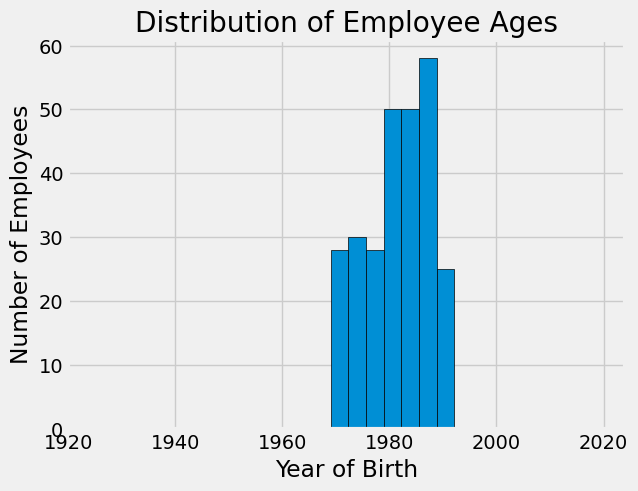

In [ ]:
# Load the data (easier for me to follow 'data' over 'df')
data = df

# Extract birth year from dob

data["birth_year"] = pd.to_datetime(data["dob"], format="%m/%d/%y").dt.year

# Create the histogram
plt.hist(data["birth_year"], bins=30, edgecolor="black")
plt.xlim(1920, 2024)
plt.xlabel("Year of Birth")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employee Ages")
plt.grid(True)
plt.show()

This histogram reveals the age distribution of the workforce to consist of emplyees who are in their late 20s to mid 30s. By looking at the spread of birth years across bins, we can identify that the company leans towards a more younger-middle demographic. This information can be valuable for planning training needs or understanding potential cultural preferences within the workplace.

**2.Department Size by Employee Count (Bar Chart):**

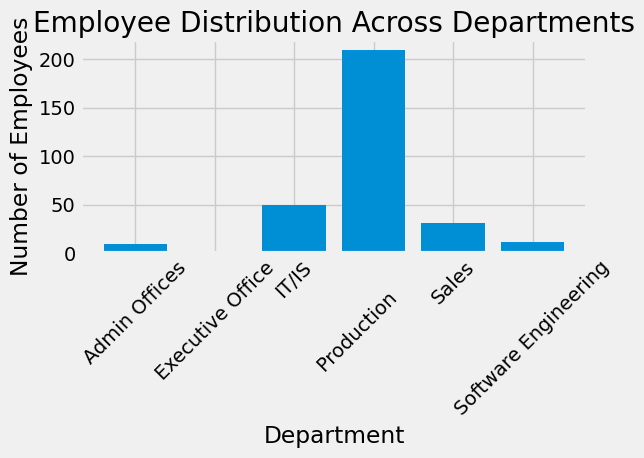

In [ ]:
# Group data by department and get employee count
dept_size = data.groupby("department")["empid"].count().reset_index()

# Create the bar chart
plt.bar(dept_size["department"], dept_size["empid"])
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution Across Departments")
plt.xticks(rotation=45)  # Rotate department names for better readability
plt.tight_layout()
plt.show()

This bar chart depicts the size of each department in terms of employee count. It helps identify departments that might be understaffed like admin offices and software engineering or overstaffed like production. Departments with a high number of employees might such as production may be experiencing workload issues, while departments with a low count might require additional resources.

**3.Employee satisfaction(box plot)**

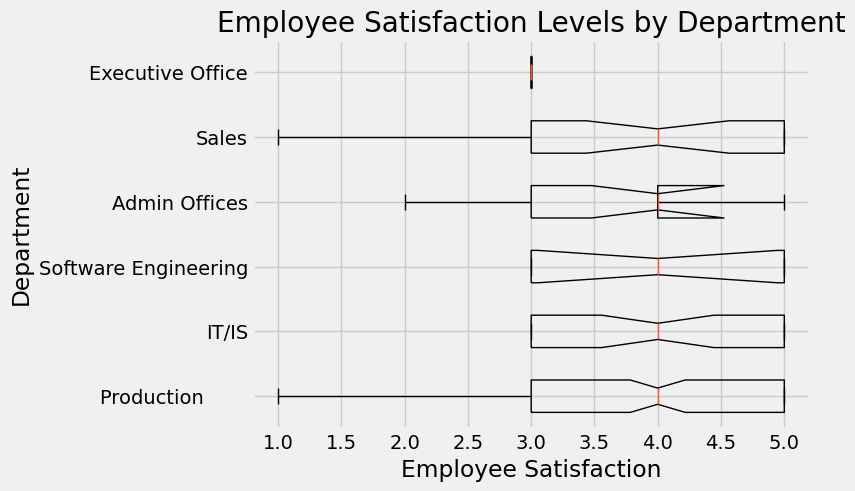

In [ ]:
plt.boxplot(
    [data[data["department"] == dept]["empsatisfaction"] for dept in data["department"].unique()],
    labels=data["department"].unique(),
    notch=True,
    vert=False,
)
plt.xlabel("Employee Satisfaction")
plt.ylabel("Department")
plt.title("Employee Satisfaction Levels by Department")
plt.grid(True)
plt.show()

This box plot compares the distribution of employee satisfaction scores across different departments. By comparing the box positions and spreads, on average all departments apart from the executive office have a significant level of satisfaction. Productionand Sales seem to have the most extreme outliers of dissatisfied employees and we should look into targeting these departments with campaigns that improve overall morale. The danger here is that those outliers may influence the departments and result in a further drop in satisfaction levels in future.


**4.Salary vs. Performance Rating (Scatter Plot):**

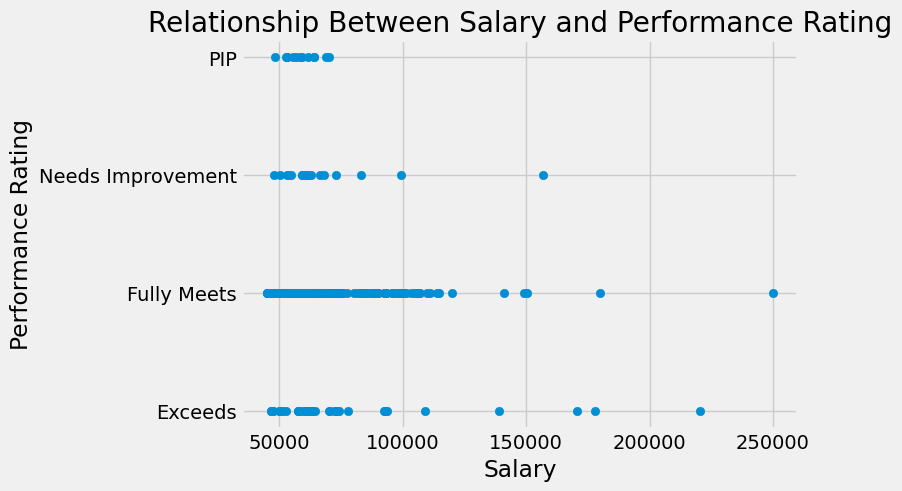

In [ ]:
# Convert performance score to numeric (since it's currently a string)
data["performance_score"] = pd.to_numeric(data["performancescore"], errors="coerce")

plt.scatter(data["salary"], data["performancescore"])
plt.xlabel("Salary")
plt.ylabel("Performance Rating")
plt.title("Relationship Between Salary and Performance Rating")
plt.grid(True)
plt.show()

There is certainly a relationship between the lowest earning employees and their perfomance. We should consider implementing performance-based incentives to motivate the emplyees who are lower earners to perform better.

**5.relationship between two categorical variables like absences and marital status**

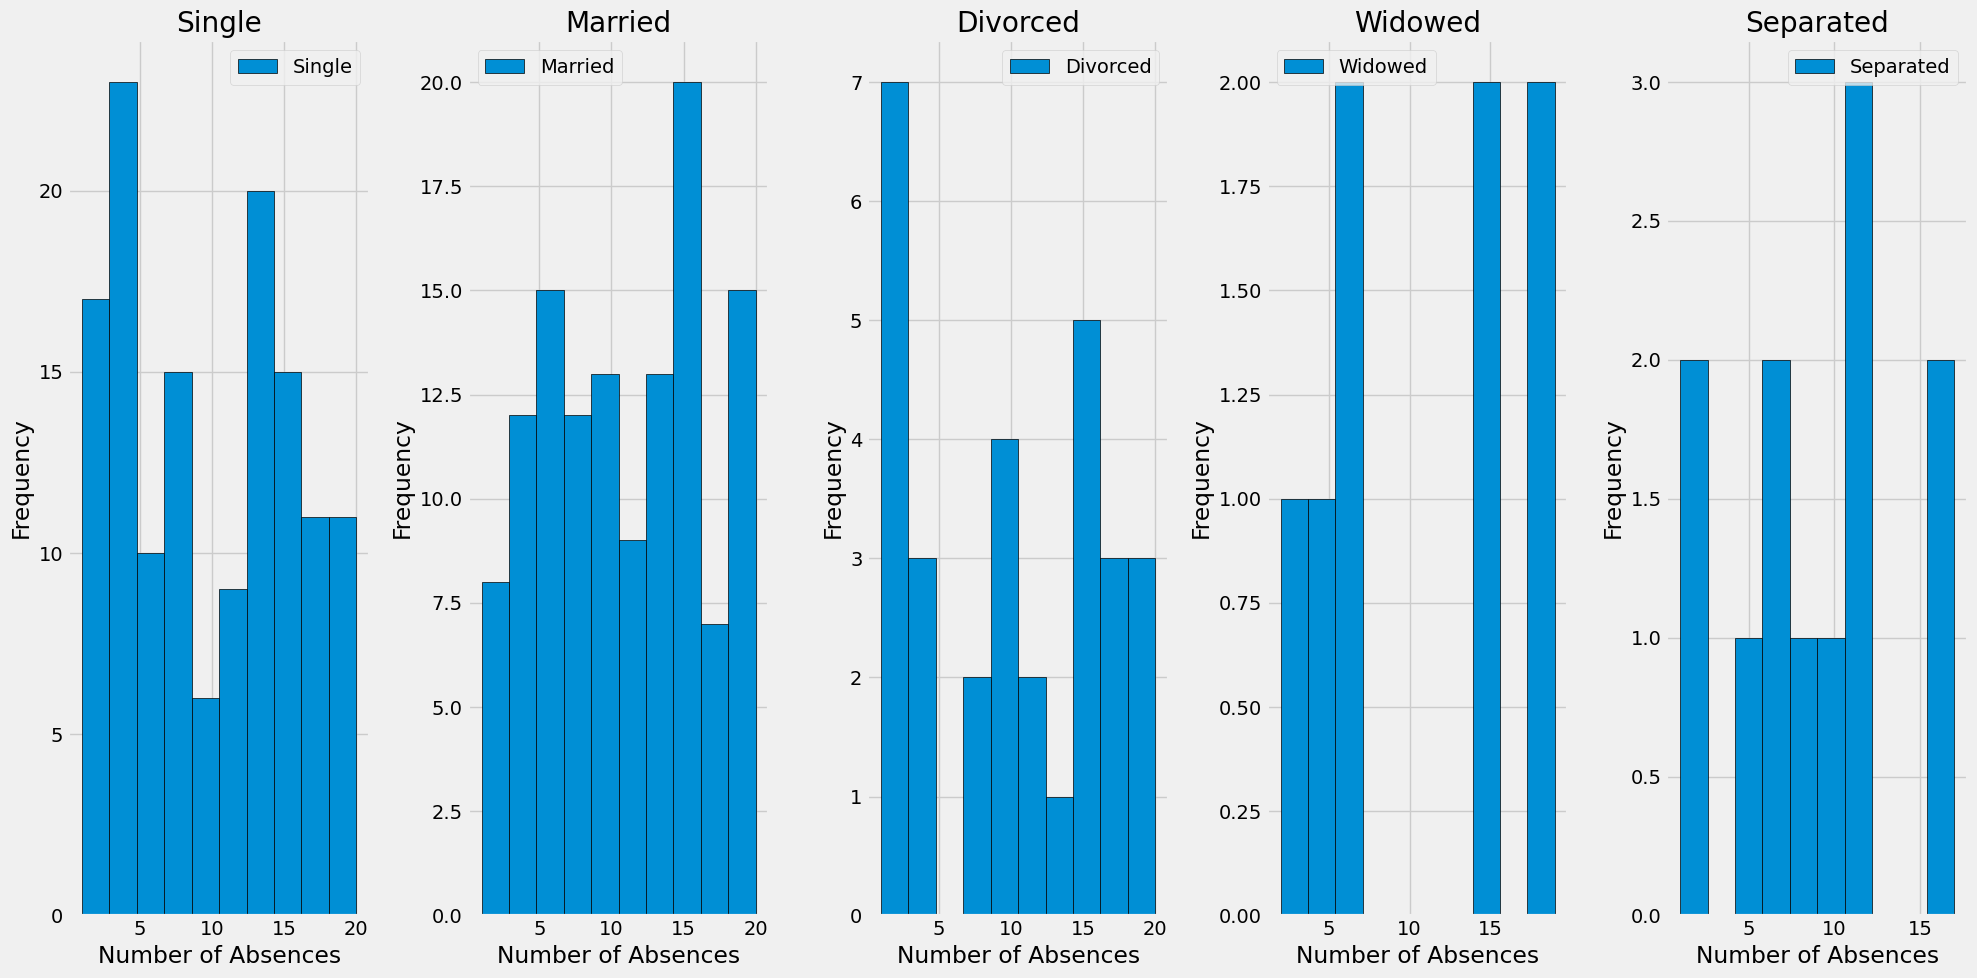

In [ ]:
# Assuming 'marital_desc' holds marital status categories and 'absences' represents absence count
marital_statuses = data["maritaldesc"].unique()

# Create the figure for multiple histograms
fig, axs = plt.subplots(1, len(marital_statuses), figsize=(20, 10))  # Adjusted figsize

# Loop through marital statuses and create histograms
for i, status in enumerate(marital_statuses):
    data_subset = data[data["maritaldesc"] == status]
    axs[i].hist(data_subset["absences"], bins=10, edgecolor="black", label=status)
    axs[i].set_xlabel("Number of Absences")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(status)
    axs[i].legend()  # Add legend for each subplot

#Adjust layout and spacing
plt.tight_layout()
plt.show()

By comparing the above shapes and positions of the histograms, we can see that married and single employees tend to have higher frequency of absence.

##Conclusion and Recommendations

**1. Invest in Training and Development for High Potential Departments:**
>Analyze data to see which departments benefit most from training (better results after training). Then, create specific training programs for those departments and track their effectiveness.

**2. Address Potential Pay Gaps based on Salary vs. Performance Analysis:**
>Use charts to identify high performers who might be underpaid. Conduct a thorough review to ensure everyone is paid fairly based on their job, experience, and performance (including comparing salaries to similar jobs outside the company). Communicate any pay adjustments clearly to employees.

**3. Implement Targeted Retention Strategies for Departments with Low Job Satisfaction:**
>Look for departments with low satisfaction scores (box plots). Talk directly to employees (surveys/focus groups) to understand their concerns. Analyze data on workload, work-life balance, and communication to find areas for improvement.
